In [1]:

import pandas as pd

iowa_file_path = 'train.csv'

home_data = pd.read_csv(iowa_file_path)


In [2]:

home_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Step 1: Specify Prediction Target
Select the target variable, which corresponds to the sales price. Save this to a new variable called `y`. You'll need to print a list of the columns to find the name of the column you need.


In [3]:
y=home_data.SalePrice
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

## Step 2: Create X
Now you will create a DataFrame called `X` holding the predictive features.

Since you want only some columns from the original data, you'll first create a list with the names of the columns you want in `X`.


In [4]:
X = home_data[['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']]

In [5]:
X.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,2003,856,854,2,3,8
1,9600,1976,1262,0,2,3,6
2,11250,2001,920,866,2,3,6
3,9550,1915,961,756,1,3,7
4,14260,2000,1145,1053,2,4,9


## Review Data
Before building a model, take a quick look at **X** to verify it looks sensible

In [6]:
X.describe()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1971.267808,1162.626712,346.992466,1.565068,2.866438,6.517808
std,9981.264932,30.202904,386.587738,436.528436,0.550916,0.815778,1.625393
min,1300.000000,1872.000000,334.000000,0.000000,0.000000,0.000000,2.000000
25%,7553.500000,1954.000000,882.000000,0.000000,1.000000,2.000000,5.000000
50%,9478.500000,1973.000000,1087.000000,0.000000,2.000000,3.000000,6.000000
75%,11601.500000,2000.000000,1391.250000,728.000000,2.000000,3.000000,7.000000
max,215245.000000,2010.000000,4692.000000,2065.000000,3.000000,8.000000,14.000000


In [7]:
X.isnull().sum()

LotArea         0
YearBuilt       0
1stFlrSF        0
2ndFlrSF        0
FullBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
dtype: int64

In [8]:
feature_names =['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']

In [9]:
X=home_data[feature_names]
X.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,2003,856,854,2,3,8
1,9600,1976,1262,0,2,3,6
2,11250,2001,920,866,2,3,6
3,9550,1915,961,756,1,3,7
4,14260,2000,1145,1053,2,4,9


## Step 3: Specify and Fit Model
Create a `DecisionTreeRegressor` and save it iowa_model. Ensure you've done the relevant import from sklearn to run this command.
Then fit the model.

In [10]:
from sklearn.tree import DecisionTreeRegressor
#specify the model. 
#For model reproducibility, set a numeric value for random_state when specifying the model
iowa_model = DecisionTreeRegressor(random_state=1)

In [11]:
# Fit the model
iowa_model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

## Step 4: Make Predictions
Make predictions with the model's `predict` command using `X` as the data.

In [12]:
predictions = iowa_model.predict(X)
print(predictions)

[208500. 181500. 223500. ... 266500. 142125. 147500.]


## Think About Your Results

Use the `head` method to compare the top few predictions to the actual home values (in `y`) for those same homes. Anything surprising?


In [75]:
predictions = iowa_model.predict(X)
print(predictions)

[208500. 171000. 235000. ... 266500. 142125. 147500.]


In [55]:
pred=iowa_model.predict(X[:30])
print(pred)

[208500. 171000. 235000. 140000. 268000. 170000. 307000. 200000. 145000.
 109000. 129500. 345000. 144000. 279500. 140000. 132000. 149000.  90000.
 155000. 154000. 325300. 139400. 230000. 129900. 154000. 256300. 134800.
 240000. 207500.  91000.]


In [65]:
print("First in-sample predictions:", iowa_model.predict(X.head()))
print("Actual target values for those homes:", y.head().tolist())

First in-sample predictions: [208500. 171000. 235000. 140000. 268000.]
Actual target values for those homes: [208500, 181500, 223500, 140000, 250000]


In [64]:
#print(y[:20])

## Visualization


use the pydotplus package to create a visualization of the decision tree model (in pdf)

In [23]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(iowa_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("dectree.pdf")


Compare predictions with actual target values 

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

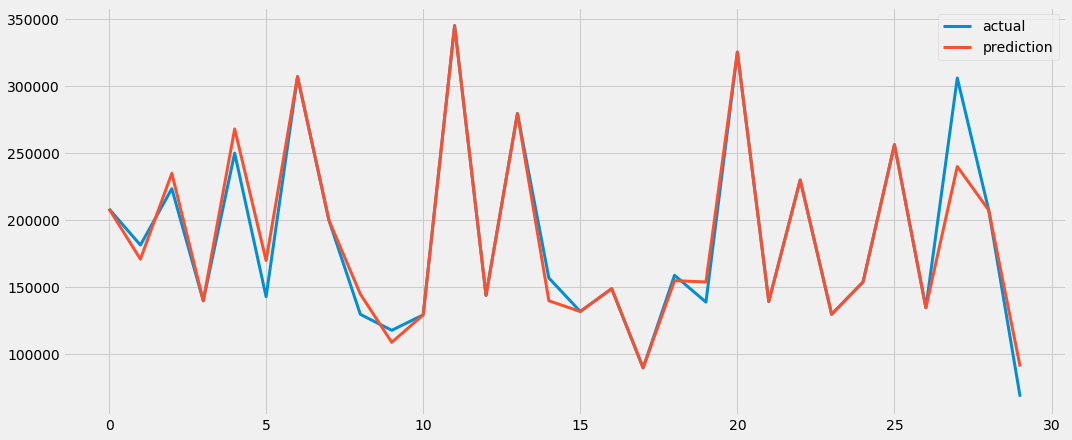

In [63]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,7)) 
plt.plot(y[:30], linewidth=3)
plt.plot(pred, linewidth=3)
plt.legend(('actual', 'prediction'),
           loc='upper right')

## Model Validation

### MAE

Calculate the Mean Absolute Error in Validation Data

In [110]:
from sklearn.metrics import mean_absolute_error

predicted_sales_prices = iowa_model.predict(X)
mean_absolute_error(y, predicted_sales_prices).round(2)

8507.36

 It takes the absolute difference between the actual and forecasted values and finds the average.

The result is satisfactory 

Since this pattern was derived from the training data, the model will appear accurate in the training data.

In [104]:
a=predicted_sales_prices.mean()
a

180482.32054794522

In [103]:
b=y.mean()
b

180921.19589041095

In [111]:
abs(a-b).round(2)

438.88

#### Theory

As the name suggests, the mean absolute error is an average of the absolute errors |e_{i}|=|y_{i}-x_{i}|} , where y_{i} is the prediction and  x_{i} the true value. 

Why not to use Accuracy? Accuracy is a classification metric. You can't use it with a regression.In general you cannot expect to get exactly correct results from a regression model. What you hope for is that your predictions are overall close to the real values. To decide if they are close enough, you need to use a different evaluation metric (one of the regression metrics)

 For regression problems you can use: R2 Score, MSE (Mean Squared Error), RMSE (Root Mean Squared Error).

The scikit-learn library has a function train_test_split to break up the data into two pieces. We'll use some of that data as training data to fit the model, and we'll use the other data as validation data to calculate mean_absolute_error.

Mean Absolute Error (MAE) and Root mean squared error (RMSE) are two of the most common metrics used to measure accuracy for continuous variables. 

In MAE and RMSE you simply look at the "average difference" between those two values - so you interpret them comparing to the scale of your valiable,

Similarities: Both MAE and RMSE express average model prediction error in units of the variable of interest. Both metrics can range from 0 to ∞ and are indifferent to the direction of errors. They are negatively-oriented scores, which means lower values are better.

Differences: Taking the square root of the average squared errors has some interesting implications for RMSE. Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. This means the RMSE should be more useful when large errors are particularly undesirable. 

#### RMSE

In [153]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y, predictions))
rms

27371.470482017314

#### MSE

In [82]:
print(mean_squared_error(y, predictions))

749197396.3479452


### train_test_split

Since models' practical value come from making predictions on new data, we measure performance on data that wasn't used to build the model. The most straightforward way to do this is to exclude some data from the model-building process, and then use those to test the model's accuracy on data it hasn't seen before. This data is called validation data.



In [113]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
iowa_model = DecisionTreeRegressor()
# Fit model
iowa_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = iowa_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions).round(2))

32485.53


In [67]:
#print("Accuracy:",metrics.accuracy_score(val_y, val_predictions))

the result is not satisfactory, we need to try other model types or better features

## Experimenting With Different Models

You can see in scikit-learn's documentation that the decision tree model has many options (more than you'll want or need for a long time). The most important options determine the tree's depth. It is a measure of how many splits it makes before coming to a prediction

#### Overfitting
when a model matches the training data almost perfectly, but does poorly in validation and other new data.
happens because the data is divided among too many leaves, some of them have too small amount of samples, and thus the predictions are similar to these few samples, but are poor when we test them on new data 

#### Underfitting
When a model fails to capture important distinctions and patterns in the data, so it performs poorly even in training data

Since we care about accuracy on new data, which we estimate from our validation data, we want to find the sweet spot between underfitting and overfitting.

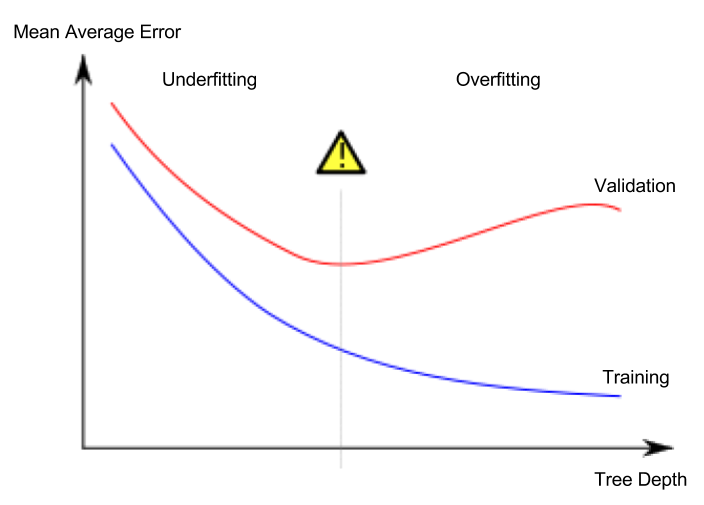

In [130]:
from IPython.display import Image
Image(filename='dtmodel.png', width= 400)

##### max_leaf_nodes 
This argument provides a very sensible way to control overfitting vs underfitting. The more leaves we allow the model to make, the more we move from the underfitting area in the above graph to the overfitting area.

In [136]:

#We can use a utility function to help compare MAE scores from different values for max_leaf_nodes:

from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [150]:
#We can use a for-loop to compare the accuracy of models built with different values for max_leaf_nodes.

for max_leaf_nodes in [2, 5, 25, 30, 50, 60, 55, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 2  		 Mean Absolute Error:  45933
Max leaf nodes: 5  		 Mean Absolute Error:  35190
Max leaf nodes: 25  		 Mean Absolute Error:  28501
Max leaf nodes: 30  		 Mean Absolute Error:  28302
Max leaf nodes: 50  		 Mean Absolute Error:  27825
Max leaf nodes: 60  		 Mean Absolute Error:  28072
Max leaf nodes: 55  		 Mean Absolute Error:  27881
Max leaf nodes: 500  		 Mean Absolute Error:  32662
Max leaf nodes: 5000  		 Mean Absolute Error:  33382


the optimal number of leaves is 50


1. Overfitting: capturing spurious patterns that won't recur in the future, leading to less accurate predictions, or
2. Underfitting: failing to capture relevant patterns, again leading to less accurate predictions.
3. We use validation data, which isn't used in model training, to measure a candidate model's accuracy.

In [95]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [102]:
y_pred = linreg.predict(val_X)

In [114]:
print(metrics.mean_absolute_error(val_y, y_pred).round(2))

28428.2


already better

In [119]:
print(metrics.mean_squared_error(val_y, y_pred).round(2))

2583485885.86


In [115]:
import numpy as np
print(np.sqrt(metrics.mean_squared_error(val_y, y_pred)).round(2))

50828.0
